In [ ]:


!pip install mlflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.0/29.0 MB 50.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 62.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 722.9/722.9 kB 29.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.0/119.0 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.9/194.9 kB 11.9 MB/s eta 0:00:00
  Attempting uninstall: importlib_metadata
    Found existing installation: importlib_metadata 8.7.0
    Uninstalling import

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Himanshu-1703/reddit-sentiment-analysis/refs/heads/main/data/reddit.csv')
df.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df=df[~(df['clean_comment'].str.strip()==' ')]

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
def preprocess_comment(comment):
  comment=comment.lower()

  comment=comment.strip()

  comment=re.sub(r'\n',' ', comment)

  comment=re.sub(r'[^A-Za-z0-9\s!?.,]','',comment)

  stop_words=set(stopwords.words('english')) - {'not','no','but','however','yet'}

  comment=' '.join([word for word in comment.split() if word not in stop_words])

  lemmatizer=WordNetLemmatizer()

  comment=' '.join([lemmatizer.lemmatize(word) for word in comment.split()])

  return comment



In [ ]:
df['clean_comment']=df['clean_comment'].apply(preprocess_comment)

In [ ]:
df.head()


,clean_comment,category
0,family mormon never tried explain still stare ...,1
1,buddhism much lot compatible christianity espe...,1
2,seriously say thing first get complex explain ...,-1
3,learned want teach different focus goal not wr...,0
4,benefit may want read living buddha living chr...,1


In [ ]:
import mlflow
import mlflow.sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split,cross_val_predict,StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
vectorizer=CountVectorizer(max_features=10000)
X=vectorizer.fit_transform(df['clean_comment']).toarray()
y=df['category']

In [ ]:
print(X)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
X.shape

(36799, 10000)

In [ ]:
y

,category
0,1
1,1
2,-1
3,0
4,1
...,...
37244,0
37245,1
37246,0
37247,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

2025/06/03 21:48:19 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForest_Baseline_TrainTestSplit at: https://dagshub.com/sreyo2004/mlflow-test.mlflow/#/experiments/1/runs/3b4554b2c6c94fe28227ba198e701e5a
🧪 View experiment at: https://dagshub.com/sreyo2004/mlflow-test.mlflow/#/experiments/1


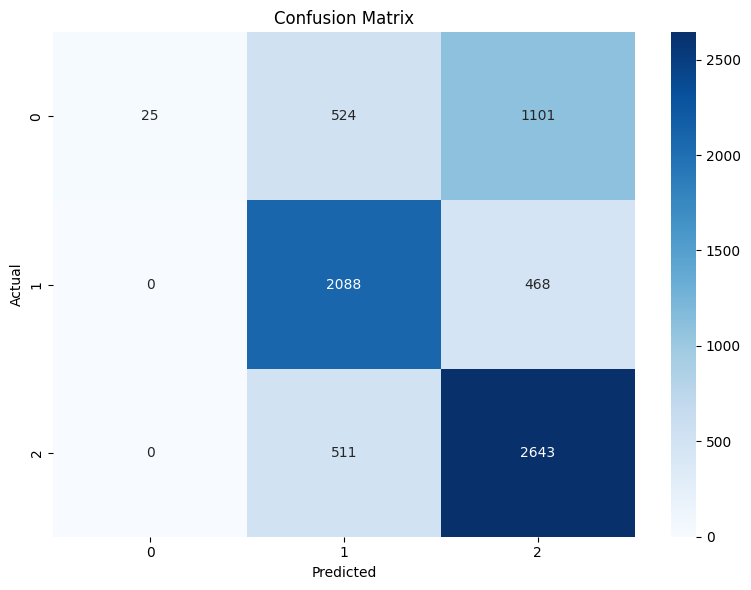

In [ ]:
import os
import mlflow
import mlflow.sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd



# MLflow tracking setup
os.environ["MLFLOW_TRACKING_USERNAME"] = "sreyo2004"
os.environ["MLFLOW_TRACKING_PASSWORD"] = "2e388301d95268abcfe1564cf5eea025879da4a3"
mlflow.set_tracking_uri("https://dagshub.com/sreyo2004/mlflow-test.mlflow")
mlflow.set_experiment("RF Baseline")

with mlflow.start_run(run_name="RandomForest_Baseline_TrainTestSplit") as run:
    # 1. Tags: Descriptive metadata
    mlflow.set_tag("experiment_type", "baseline")
    mlflow.set_tag("model_type", "RandomForest")
    mlflow.set_tag("description", "Baseline RandomForest model for sentiment analysis using BoW with a train-test split")

    # 2. Params: Model & vectorizer configuration
    mlflow.log_param("vectorizer_type", "CountVectorizer")
    mlflow.log_param("vectorizer_max_features", vectorizer.max_features)

    n_estimators = 100
    max_depth = 15
    mlflow.log_param("n_estimators", n_estimators)
    mlflow.log_param("max_depth", max_depth)

    # 3. Train the model
    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    model.fit(X_train, y_train)

    # 4. Predict and calculate accuracy
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    mlflow.log_metric("accuracy", accuracy)

    # 5. Log classification report metrics
    classification_rep = classification_report(y_test, y_pred, output_dict=True)
    for label, metrics in classification_rep.items():
        if isinstance(metrics, dict):
            for metric, value in metrics.items():
                mlflow.log_metric(f"{label}_{metric}", value)
        else:
            mlflow.log_metric(label, metrics)

    # 6. Confusion matrix plot
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.tight_layout()
    plt.savefig("confusion_matrix.png")
    mlflow.log_artifact("confusion_matrix.png")

    # 7. Log the model itself
    mlflow.sklearn.log_model(model, "random_forest_model")

    # 8. Optionally log the dataset
    df.to_csv("dataset.csv", index=False)
    mlflow.log_artifact("dataset.csv")



In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
df.to_csv('reddit_preprocessing.csv',index=False)

In [ ]:
pd.read_csv('reddit_preprocessing.csv').head()